Load Pandas/ Import pandas from library

In [1]:
import pandas as pd

Loading Data from Lukebarousse for data jobs

In [29]:
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
print(data)
# Loading Data into pandas dataframe
df = data['train'].to_pandas()
df.info()
# Change into date Format
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
# Selecting only Australia job and removing missing values
Aus_Job = df[df.job_country == 'Australia']
# Only gives not null values
aus_jobs = Aus_Job.salary_year_avg.notna()

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_

In [31]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


Median Salary

In [3]:
median_Salary_year  = df['salary_year_avg'].median()
median_Salary_hourly  = df['salary_hour_avg'].median()

In [36]:
df_filled = df.copy() # Making new copy
# Filling Median value in Missing place
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_Salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_Salary_hourly)

In [37]:
# Provides specific column of dataset
df_filled.loc[:,'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
...,...,...
785736,115000.0,45.98
785737,115000.0,45.98
785738,115000.0,45.98
785739,115000.0,45.98


In [6]:
df_unique = df_filled
# Dropping duplicates and keep only unique values
df_unique = df_unique.drop_duplicates()

Creating Pivot Tables with jobs, country and median salary.

In [38]:
df_salary_job_country = df_filled.pivot_table(values = 'salary_year_avg',index = 'job_country',columns = 'job_title_short',aggfunc='median')
     

In [8]:
df_salary_job_country

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [42]:
# Top countries
top_countries = df['job_country'].value_counts().head(10).index
print(top_countries)

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain', 'Singapore', 'Sudan', 'Netherlands', 'Italy'],
      dtype='object', name='job_country')


In [39]:
top10Countries = df_salary_job_country.loc[top_countries]
print(top10Countries)

job_title_short  Business Analyst  Cloud Engineer  Data Analyst  \
job_country                                                       
United States            115000.0        115000.0      115000.0   
India                    115000.0        115000.0      115000.0   
United Kingdom           115000.0        115000.0      115000.0   
France                   115000.0        115000.0      115000.0   
Germany                  115000.0        115000.0      115000.0   
Spain                    115000.0        115000.0      115000.0   
Singapore                115000.0        115000.0      115000.0   
Sudan                    115000.0        115000.0      115000.0   
Netherlands              115000.0        115000.0      115000.0   
Italy                    115000.0        115000.0      115000.0   

job_title_short  Data Engineer  Data Scientist  Machine Learning Engineer  \
job_country                                                                 
United States         115000.0        115

In [11]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

In [12]:
df_job_country_salary = top10Countries[job_titles]

In [13]:
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0
Singapore,99500.0,98301.5,131560.0
Sudan,87500.0,127500.0,130000.0
Netherlands,93852.0,97444.0,157500.0


<Axes: xlabel='job_country'>

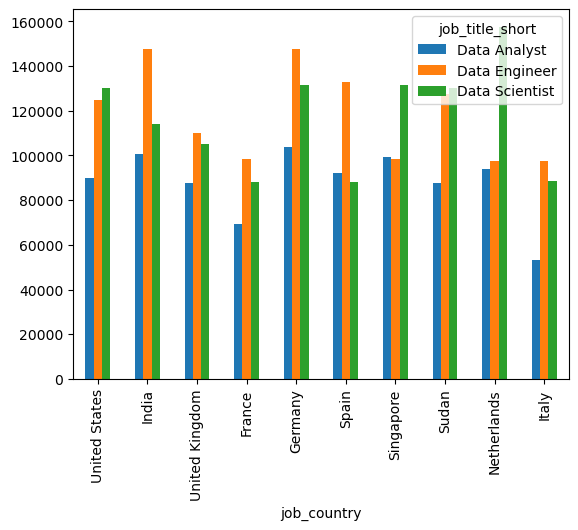

In [14]:
df_job_country_salary.plot(kind = 'bar')

In [15]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

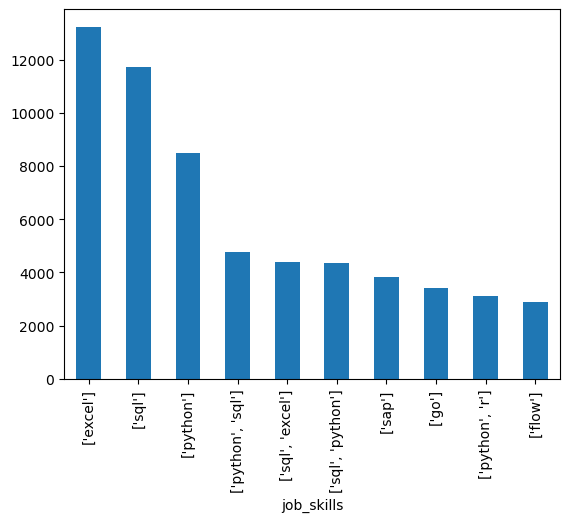

In [16]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [17]:
skillcounts = df_exploded.groupby(['job_title_short','job_skills']).size()

In [46]:
df_skills_count = skillcounts.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by= 'skill_count',ascending =False)

In [56]:
job_title = 'Data Analyst'
top_skills = 10
df_skill_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)
df_skill_final = df_skill_final.sort_values(by='skill_count', ascending=True)

<Axes: ylabel='job_skills'>

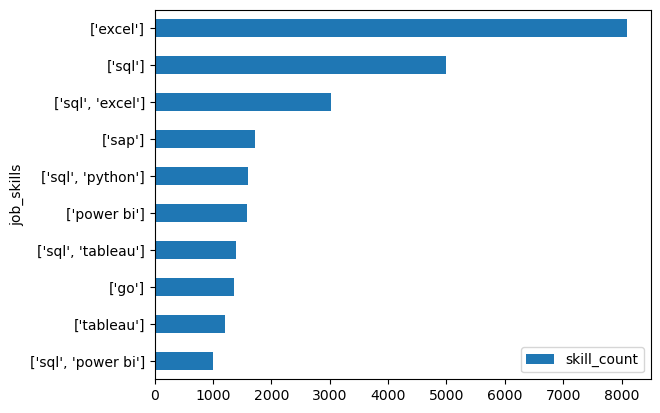

In [57]:
df_skill_final.plot(kind = 'barh',x= 'job_skills',y = 'skill_count')

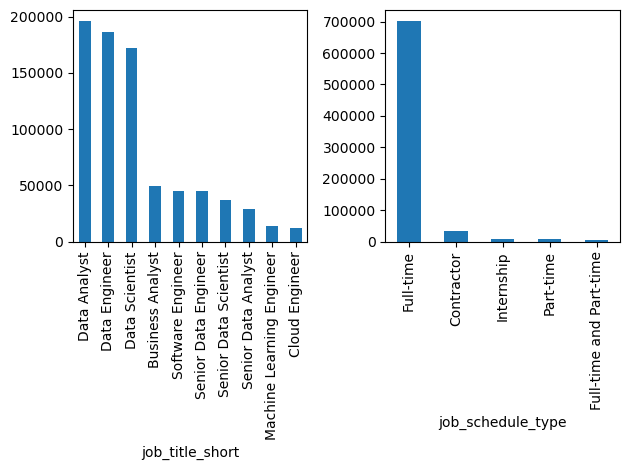

In [53]:
import matplotlib.pyplot as plt


fig,ax= plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind = 'bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(5).plot(kind = 'bar',ax=ax[1])

fig.tight_layout()

In [22]:
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [23]:
skills_stats = df_exploded.groupby('job_skills').agg(skill_count = ('job_skills','count'),median_salary=('salary_year_avg','median'))
skills_stats = skills_stats.sort_values(by= 'skill_count',ascending = False).head(10)

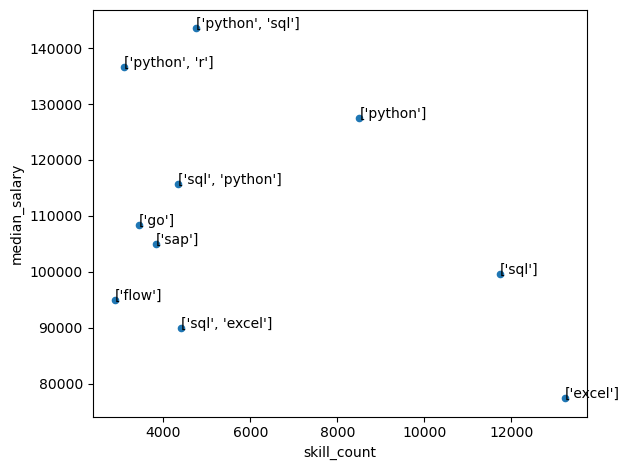

In [24]:
skills_stats.plot(kind = 'scatter',x='skill_count',y='median_salary')

for i,txt in enumerate(skills_stats.index):
  plt.text(skills_stats['skill_count'].iloc[i],skills_stats['median_salary'].iloc[i],txt)
  plt.tight_layout()